In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Read Data From File

In [10]:
data = pd.read_csv('../data/training_data.csv', index_col=0)
data.fillna(0, inplace=True)

In [11]:
data.head()

,Id,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,C,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,1,1970379,0,0,0,0,2566099,928419,0,0,...,0,0,0,0,7758,17442,0,0,0,240167
defunkt,2,4609687,0,0,0,0,0,470103,0,0,...,0,0,0,0,6399,23938,0,0,0,896415
pjhyett,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wycats,4,3378185,0,0,0,0,2687760,952,0,0,...,0,0,0,0,21641,441513,0,0,0,3060
ezmobius,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.describe()

,Id,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,C,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
count,25.00000,2.500000e+01,25.00,25.00,25.0,25.0,2.500000e+01,25.000000,25.0,25.00,...,25.0,25.0,25.0,25.0,25.000000,25.000000,25.0,25.0,25.0,25.000000
mean,20.04000,4.021643e+05,6035.68,2525.92,0.0,0.0,2.102571e+05,160551.440000,171.4,5028.96,...,0.0,0.0,0.0,0.0,1530.880000,24416.280000,0.0,0.0,0.0,76338.960000
std,11.44727,1.163803e+06,30178.40,12629.60,0.0,0.0,7.275450e+05,320821.250487,857.0,25144.80,...,0.0,0.0,0.0,0.0,4635.939372,88668.188186,0.0,0.0,0.0,216561.786775
min,1.00000,0.000000e+00,0.00,0.00,0.0,0.0,0.000000e+00,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,7.00000,0.000000e+00,0.00,0.00,0.0,0.0,0.000000e+00,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,22.00000,0.000000e+00,0.00,0.00,0.0,0.0,0.000000e+00,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,29.00000,1.480000e+02,0.00,0.00,0.0,0.0,0.000000e+00,43311.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.000000,4962.000000,0.0,0.0,0.0,8688.000000
max,36.00000,4.609687e+06,150892.00,63148.00,0.0,0.0,2.687760e+06,959258.000000,4285.0,125724.00,...,0.0,0.0,0.0,0.0,21641.000000,441513.000000,0.0,0.0,0.0,896415.000000


## Transform Data

#### 1. Standardize the data using a StandardScaler

In [13]:
scaler = StandardScaler()
col = ["JavaScript", "Python", "Java", "C#", "PHP", "TypeScript", "Ruby", "C++", "C", "Swift", "Go", "Shell", "Kotlin", "Rust", "PowerShell", "Objective-C", "R", "MATLAB", "Dart", "Vue", "Assembly", "Sass", "CSS", "HTML", "Pascal", "Racket", "Zig", "Other"]
data[[x + '-T' for x in col]] = scaler.fit_transform(data[col])
data.head()

,Id,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,C,...,Dart-T,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,1,1970379,0,0,0,0,2566099,928419,0,0,...,0.0,0.0,0.0,0.0,1.370926,-0.080278,0.0,0.0,0.0,0.772095
defunkt,2,4609687,0,0,0,0,0,470103,0,0,...,0.0,0.0,0.0,0.0,1.071736,-0.005505,0.0,0.0,0.0,3.864886
pjhyett,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,-0.337029,-0.281045,0.0,0.0,0.0,-0.359773
wycats,4,3378185,0,0,0,0,2687760,952,0,0,...,0.0,0.0,0.0,0.0,4.427324,4.801018,0.0,0.0,0.0,-0.345352
ezmobius,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,-0.337029,-0.281045,0.0,0.0,0.0,-0.359773


#### 2. Determine Number of Clusters

In [20]:
def optimize_kmeans(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    
    # generate elbow
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), inertia)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method')
    plt.show()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

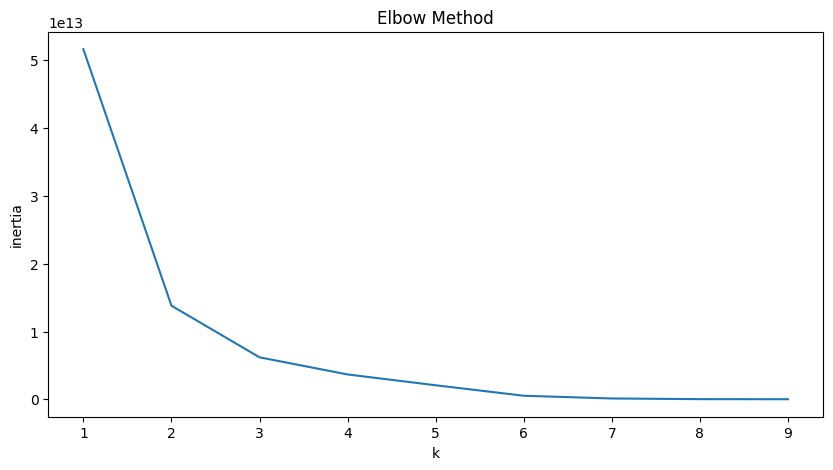

In [23]:
optimize_kmeans(data, 10)

#### 3. Apply K-Means Clustering

In [19]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
data['cluster'] = kmeans.labels_
data.head()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Id,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,C,...,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T,cluster
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,1,1970379,0,0,0,0,2566099,928419,0,0,...,0.0,0.0,0.0,1.370926,-0.080278,0.0,0.0,0.0,0.772095,1
defunkt,2,4609687,0,0,0,0,0,470103,0,0,...,0.0,0.0,0.0,1.071736,-0.005505,0.0,0.0,0.0,3.864886,2
pjhyett,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,-0.337029,-0.281045,0.0,0.0,0.0,-0.359773,0
wycats,4,3378185,0,0,0,0,2687760,952,0,0,...,0.0,0.0,0.0,4.427324,4.801018,0.0,0.0,0.0,-0.345352,1
ezmobius,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,-0.337029,-0.281045,0.0,0.0,0.0,-0.359773,0


## Write to File